<p style="background:#f4f4f4; padding:5px; margin-left:-5px;margin-bottom:0px">
Informática - 1º de Física
<br>
<strong>Introducción a la Programación</strong>
</p>

## Integración numérica

Las leyes de evolución de muchos sistemas se expresan mediante  [ecuaciones diferenciales](https://en.wikipedia.org/wiki/Differential_equation).  Aparecen en todos los campos de la física y se estudiarán en profundidad en otras asignaturas: las ecuaciones de Newton, Lagrange y Hamilton en mecánica clásica, las ecuaciones de Maxwell en electromagnetismo, la ecuación de Schrödinger en mecánica cuántica, etc.

Estas ecuaciones expresan ciertas propiedades matemáticas que tiene que cumplir la solución del problema, pero no la solución propiamente dicha, que no siempre es fácil de encontrar de forma analítica.
Por ejemplo, si un cuerpo sufre una fuerza constante tenemos un sencillo movimiento uniformemente acelerado, pero si la fuerza depende de la posición (como ocurre en la órbita de un satélite) se producirá un fenómeno interesante: la trayectoria dependerá de las aceleraciones sufridas, que dependen a su vez de la trayectoria.


Un caso sencillo es el de un cuerpo sujeto a un muelle ([oscilador armónico](https://en.wikipedia.org/wiki/Harmonic_oscillator)). La fuerza es proporcional al desplazamiento: $F=-k\,x$, por lo que la trayectoria es la solución de $m x''(t) = - k\, x(t)$. Usando la [notación de Newton](https://en.wikipedia.org/wiki/Notation_for_differentiation#Newton.27s_notation), que utiliza puntos encima de las variables para indicar las derivadas respecto al tiempo, la ecuación se expresa más brevemente como $\,{m \ddot x = - k\, x}$. 
Otro ejemplo es la [desintegración radioactiva](https://en.wikipedia.org/wiki/Radioactive_decay#Universal_law_of_radioactive_decay), donde la cantidad de sustancia cumple $\,\dot x = - \lambda x$. 

Estas ecuaciones tan simples se pueden resolver por inspección, recordando las derivadas de las funciones seno, coseno y exponencial. En cambio, las ecuaciones diferenciales que aparecen en situaciones más complejas son muy difíciles, o imposibles, de resolver analíticamente. Pero no todo está perdido: mediante cálculo numérico se pueden conseguir soluciones numéricas muy precisas. En este capítulo presentaremos las herramientas informáticas disponibles para esta tarea.

Hay una gran diferencia entre una solución analítica como $x(t)=A \sin(\omega t)$ y una solución numérica como la siguiente:

    t     x(t)
    -----------
    0.0   2.00
    0.1   1.97
    0.2   1.84
    ...   ....
    
Las soluciones analíticas son generales, válidas para diferentes valores de los parámetros y sus propiedades pueden estudiarse mediante razonamiento matemático.

Las soluciones numéricas solo pueden construirse con valores definidos de los parámetros y con unas condiciones iniciales dadas. Sirven para contestar a la pregunta "¿qué pasaría en este caso concreto?"  Afortunadamente los ordenadores pueden simular muchas situaciones diferentes en un tiempo razonable, lo que permite resolver problemas de gran complejidad. Pero siempre es imprescindible comprobar la validez física de los resultados: las herramientas computacionales y el análisis matemático son métodos complementarios.

## odeint

La herramienta  [odeint](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html) proporcionada por el módulo `scipy.integrate` sirve para resolver una gran variedad de problemas de integración numérica. Esta herramienta es capaz de calcular con gran eficiencia y precisión los valores numéricos $f_k=f(t_k)$ de una función matemática desconocida $f(t)$ en una secuencia de puntos deseados $t_k$, a partir de una función informática capaz de calcular los valores numéricos de la derivada $f'(t)$ en cualquier $t$.

`odeint` tiene tres argumentos:

1. Una función informática que calcula el valor de la **derivada** en cada instante.

1. El **valor inicial** de la función.

1. Un vector con los **instantes de tiempo** en los que deseamos obtener la solución.


El resultado de la integración es una secuencia de valores, no una expresión matemática simbólica.

El método es muy general:


- La función informática que debemos escribir para calcular la derivada tiene dos argumentos: la variable independiente y la propia función. Esto permite resolver tanto integrales ordinarias como ecuaciones diferenciales.


- La función matemática objetivo puede tener varias componentes, lo que permite resolver sistemas de ecuaciones diferenciales.


- Las ecuaciones pueden involucrar derivadas superiores a la primera, pero entonces hay que introducir variables auxiliares para reducir la ecuación a un sistema de orden 1.

En otras palabras, `odeint` resuelve ecuaciones **vectoriales** de **primer** orden. Cada ecuación concreta que deseemos resolver debe reescribirse, con las variables auxiliares que sean precisas, de la siguiente forma:

$$\dot{ \vec f} = \operatorname{deriv}(\vec f, t)$$

Veamos algunos ejemplos.

In [1]:
from scipy.integrate import odeint

import numpy as np
import matplotlib.pyplot as plt

### Caso 1

El caso más simple ocurre cuando a derivada de la función desconocida solo depende de la variable independiente. Por ejemplo:

$$ f'(t) = \sin(t) \;\;\;\;\;\; f(0)=7$$


In [2]:
# derivada
def deriv(_, t):
    df = np.sin(t)
    return df

# valor inicial
f0 = 7

# tiempos de integración
t = np.linspace(0, 2*2*np.pi, 30)

# calculamos la integral
f = odeint( deriv, f0, t )

El resultado es la secuencia de valores numéricos de la función en los instantes deseados.

In [3]:
f

array([[7.        ],
       [7.09242412],
       [7.3526133 ],
       [7.73247132],
       [8.16178155],
       [8.56118657],
       [8.8568566 ],
       [8.99413729],
       [8.94765252],
       [8.72599489],
       [8.37013758],
       [7.94586048],
       [7.53159094],
       [7.20390627],
       [7.02337875],
       [7.02337873],
       [7.20390621],
       [7.53159085],
       [7.94586044],
       [8.37013762],
       [8.72599506],
       [8.94765287],
       [8.99413774],
       [8.85685701],
       [8.5611869 ],
       [8.16178178],
       [7.73247134],
       [7.35261329],
       [7.09242403],
       [6.99999935]])

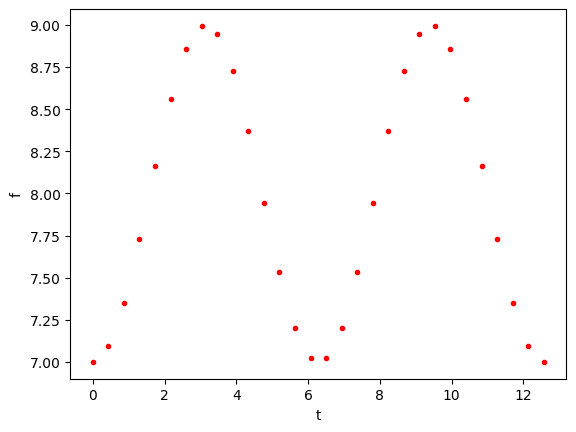

In [4]:
plt.plot(t,f,'.',color='red')
plt.xlabel('t'); plt.ylabel('f');

La solución analítica de esta integral es inmediata: $f(t) = -\cos(t) + C$, donde la constante se deduce del valor inicial.  Podemos superponerla para comprobar que la integración numérica consigue un resultado muy preciso:

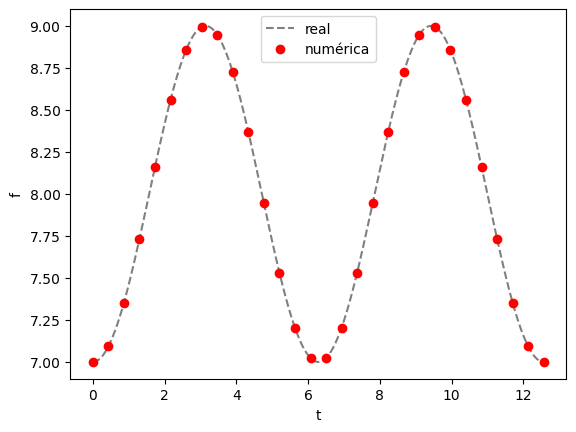

In [5]:
tc = np.linspace(0, 2*2*np.pi, 300)
fc = -np.cos(tc) + 8

plt.plot(tc, fc, color='gray', ls='dashed', label='real')
plt.plot(t,f,'o',color='red', label='numérica')
plt.legend(); plt.xlabel('t'); plt.ylabel('f');

En este ejemplo hemos elegido una discretización con pocos puntos para hacer énfasis en que el resultado de la integración numérica es una simple secuencia de números y para comparar gráficamente con la solución teórica. Pero la precisión del resultado no depende de la densidad de muestreo solicitada: odeint trabaja internamente con la densidad de muestreo adecuada teniendo en cuenta la suavidad de la derivada.

En problemas más complejos la solución teórica no se conocerá y normalmente usaremos una discretización más densa para mostrar la solución numérica con una curva continua.

En [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) hay otras funciones de integración pero en muchos casos `odeint` obtiene buenos resultados.

### Caso 2

La derivada de la función desconocida depende de la propia función. Por ejemplo:

$$f'(t) = - K \; f(t) \;\;\;\;\;\; K=0.95,\;\;f(0)=5$$

Este problema es una ecuación diferencial propiamente dicha.

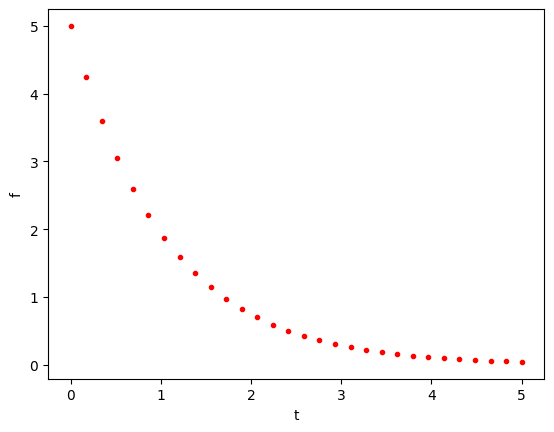

In [6]:
def deriv(f, _):
    df = -K*f
    return df

K = 0.95

f0 = 5

t = np.linspace(0, 5, 30)

f = odeint(deriv, f0, t )

plt.plot(t,f,'.',color='red')
plt.xlabel('t'); plt.ylabel('f');

En este problema la solución también se puede obtener de forma analítica: $f(t) = f(0) e^{-Kt}$. La integración numérica es de nuevo muy precisa.

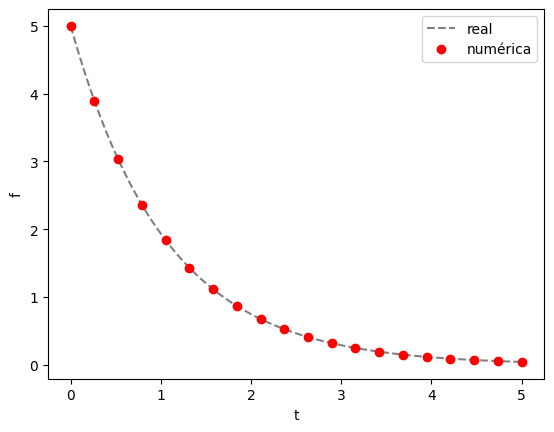

In [7]:
def deriv(f, _):
    df = -K*f
    return df

K = 0.95

f0 = 5

t = np.linspace(0, 5, 20)

f = odeint(deriv, f0, t )


tc = np.linspace(0, 5, 300)
fc = f0*np.exp(-K*tc)

plt.plot(tc, fc, color='gray', label='real', ls='dashed')
plt.plot(t,f,'o',color='red', label='numérica')
plt.legend(); plt.xlabel('t'); plt.ylabel('f');

### Caso 3

La función `odeint` también resuelve sistemas de ecuaciones. En este caso la función desconocida tendrá varias componentes.

Las [ecuaciones de Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) (depredador-presa) son un modelo sencillo de la interacción de dos especies.

\begin{aligned}x'(t)&=\alpha\, x(t)-\beta\, x(t) \,y(t),\\y'(t)&=\delta\, x(t)\,y(t)-\gamma\, y(t)\end{aligned}


Las incógnitas son las funciones $x(t)$ e $y(t)$, cuyas derivadas dependen de estas dos funciones. El sistema se puede expresar de forma más compacta, sobreentendiendo la dependencia de $t$:

\begin{aligned}\dot x&=\alpha x-\beta xy, \\ \dot y&=\delta x y-\gamma y\end{aligned}


La presa $x$ tiene alimento indefinido y crece siempre con factor $\alpha$, mientras que el predador $y$ va muriendo con factor $\gamma$. Los términos cruzados reflejan el interacción entre ambos, que dan lugar a crecimiento del depredador con factor $\delta$ y la desaparición de la presa con factor $\beta$.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

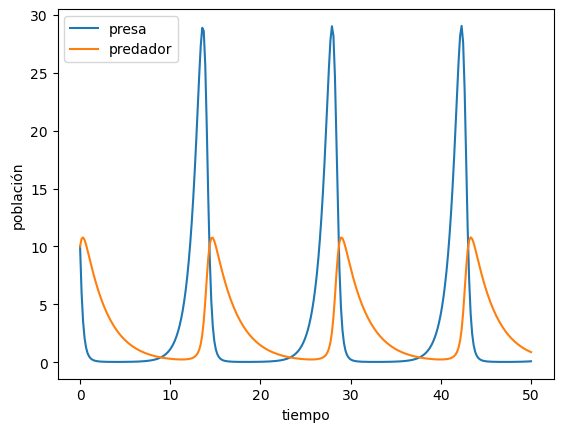

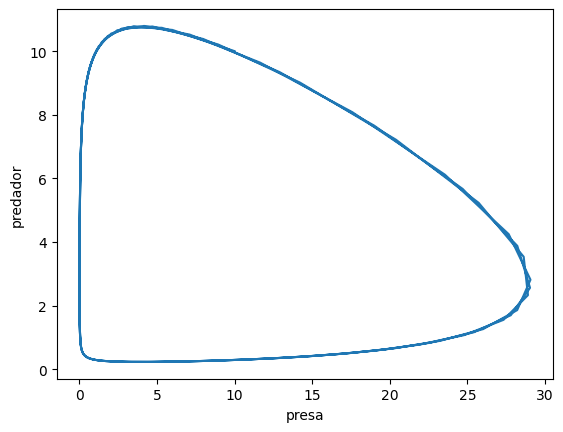

In [9]:
def deriv(f,t):
    x,y = f
    dx = a*x - b*x*y
    dy = d*x*y -g*y
    return dx,dy

a = 1.1
b = 0.4
d = 0.1
g = 0.4

x0 = 10
y0 = 10

t = np.linspace(0, 50, 300)

f = odeint(deriv, [x0,y0], t )

x,y = f.T

plt.plot(t,x,label='presa')
plt.plot(t,y,label='predador')
plt.legend(); plt.xlabel('tiempo'); plt.ylabel('población');
plt.show()
plt.plot(x,y); plt.xlabel('presa'); plt.ylabel('predador');

### Caso 4

Cuando la ecuación contiene derivadas superiores a la primera se reescribe como un sistema con variables auxiliares para reducirlo a orden uno. Por ejemplo, si tenemos que resolver la ecuación de una oscilación amortiguada:

$$\ddot{x}+0.1\dot{x}+0.95x=0$$

para $x(0)=10$, $\dot{x}(0)=0, t\in[0,20]$, lo expresamos con la variable axiliar $v = \dot x$ como:


$$ \begin{aligned}
\dot x &= v \\
\dot v &= -0.1 v - 0.95 x
\end{aligned}$$


Lo único que tenemos que hacer es escribir el código Python que calcula las derivadas. Su estructura es muy parecida en todos los problemas: extraemos las variables de estado con nombres más intuitivos, calculamos las derivadas que correspondan (algunas suelen venir directamente en el vector de estado) y las devolvemos en el orden correcto.

In [10]:
def deriv(s,t):
    x,v = s
    a = -0.95*x-0.1*v
    dx = v
    dv = a
    return dx, dv

Finalmente, llamamos al integrador `odeint` con la función `deriv`, el estado inicial, y un array de tiempos (variable independiente) en los que deseamos obtener la solución. No hay que preocuparse de elegir un intervalo de integración adecuado. Se elige internamente de forma automática, independientemente del vector de tiempos donde pedimos el resultado.

In [11]:
from scipy.integrate import odeint

t = np.linspace(0,20,300)
r = odeint(deriv,[10,0],t)

r[:5]

array([[10.        ,  0.        ],
       [ 9.97880226, -0.6328824 ],
       [ 9.91548732, -1.25886547],
       [ 9.8106041 , -1.87534429],
       [ 9.66487389, -2.47977143]])

El resultado es un array 2D cuyas filas son los valores de $s(t)$ correspondientes a cada $t$. Para hacer una gráfica de la evolución de cada variable extraemos las columnas:

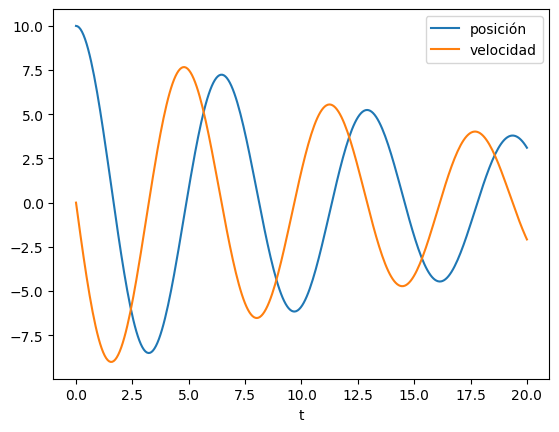

In [12]:
plt.plot(t,r[:,0],label='posición')
plt.plot(t,r[:,1],label='velocidad');
plt.legend(); plt.xlabel('t');

En vez de acceder cada vez a las columnas del resultado es más cómodo ponerles nombres. Esto se puede hacer fácilmente transponiendo la matriz:

In [13]:
x,v = r.T

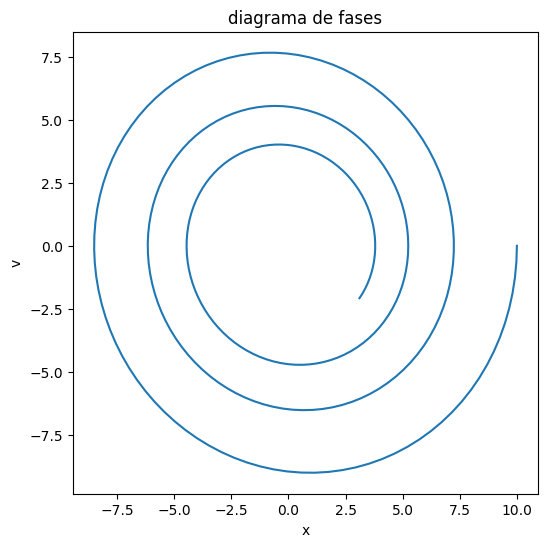

In [14]:
plt.figure(figsize=(6,6)); plt.title('diagrama de fases');
plt.plot(x,v); plt.xlabel('x'); plt.ylabel('v');

### Caso 5

En general la derivada puede depender tanto de la función como de la variable independiente. Por ejemplo, la siguiente ecuación describe una oscilación forzada. 

Pendiente.

### Tiro parabólico con fricción

La trayectoria (en 2D) de un cuerpo sometido a la fuerza de la gravedad y a la resistencia del aire, que aproximamos de forma muy simplificada como una fuerza proporcional a la velocidad, verifica las siguientes ecuaciones:

$$\begin{aligned}
\ddot x &= -\phi \dot x\\
\ddot y &= -\phi \dot y - g
\end{aligned}$$

Son dos ecuaciones de segundo orden que tenemos que reescribir como un sistema de cuatro ecuaciones de primer orden.

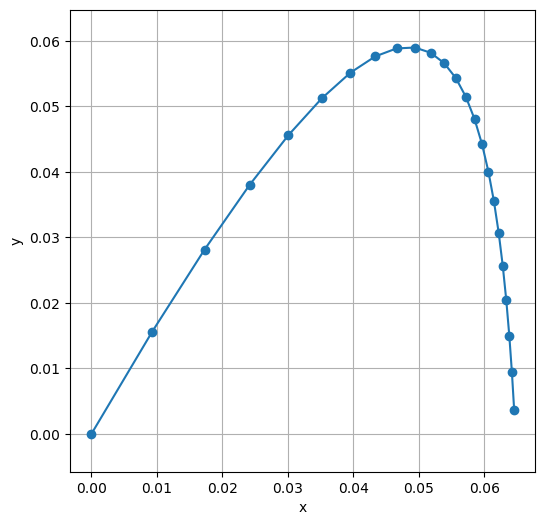

In [15]:
deg = np.pi/180

# condición inicial
v = 2
a = 60*deg

vx0 = v*np.cos(a)
vy0 = v*np.sin(a)

# parámetros físicos
f = 15
g = -9.8

# muestreo deseado de la solución
dt = 0.01
t = np.arange(0,5,dt)

def deriv(s,t):
    x,y,vx,vy = s
    ax =   - f*vx
    ay = g - f*vy
    return vx,vy,ax,ay

x,y,vx,vy = odeint( deriv, (0,0,vx0,vy0) ,t ).T

# seleccionamos el tramo de solución por encima del suelo
ok = y >= 0

plt.figure(figsize=(6,6))
plt.plot(x[ok],y[ok],'o-'); plt.grid();
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal');

### Órbita Kepleriana

El ejemplo anterior puede adaptarse fácilmente para calcular la órbita de un satélite. En función del [standard gravitational parameter](https://en.wikipedia.org/wiki/Standard_gravitational_parameter) $\mu=GM$ la ecuación del movimiento es

$$\ddot {\vec r} = - \frac{\mu}{||\vec r ||^2} \frac{\vec r}{||\vec r ||}$$

Vamos a resolver un caso ficticio para comprobar el código.

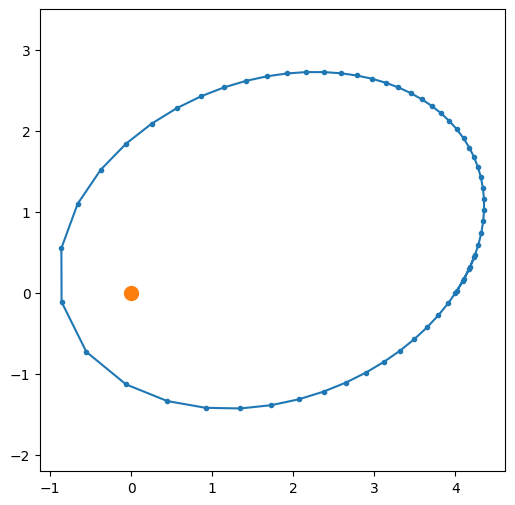

In [16]:
from scipy.integrate import odeint

mu = 1  # GM

def deriv(z,t):
    x,y,vx,vy = z
    d = (x**2 + y**2)**(1/2)
    ax = -mu*x/d**3
    ay = -mu*y/d**3
    return vx,vy,ax,ay

t = np.arange(0,30,0.5)

x,y,vx,vy = odeint( deriv, [4,0,0.2,0.3], t ).T

plt.figure(figsize=(6,6))
plt.plot(x,y,'.-');
plt.plot([0],[0],'.',markersize=20)
plt.axis('equal');

Como ejercicio, intenta simular una órbita parecida a la de la luna. Sitúa la posición inicial a 384Mm y la velocidad inicial 1Km/s. El parámetro gravitacional de la Tierra es $\mu = GM =  3.986 \times 10^{14} (m^3/s^2)$. Con esos datos completará una órbita en 26 días aproximadamente; puedes aumentar ligeramente la velocidad para que el período se aproxime más a la realidad (27.3 días). También se puede deducir la velocidad y el radio de una órbita circular que tenga el período deseado, y comprobar que la trayectoria obtenida con esos valores  es la esperada.

### Caso de estudio: periódo de un péndulo

[péndulo]: https://en.wikipedia.org/wiki/Pendulum_(mathematics)

La ecuación del movimiento de un [péndulo][péndulo] simple es:

$$\ddot \theta= - \frac{g}{l} \sin(\theta)$$

donde $\theta$ es el ángulo de desplazamiento, $g$ es la aceleración de la gravedad y $l$ la longitud. (Esta ecuación se deduce de la ley de Newton para movimiento rotacional: $\tau = I \ddot \theta$. En este caso el torque es $\tau = l\; m g \sin(\theta)$ y el momento de inercia es $I=ml^2$.)

Para oscilaciones pequeñas $\sin(\theta) \simeq \theta$, por lo que la ecuación se reduce a la del movimiento armónico simple $\ddot\theta + \omega^2 \theta =0$, cuya solución es del tipo $\sin(\omega t)$, de donde se deduce que el período de oscilación es

$$T_0 = 2\pi\sqrt{\frac{l}{g}}$$

Si las oscilaciones son más grandes la aproximación deja de ser válida y el período tiene una expresión más complicada, en función de la amplitud máxima $\theta_m$:

$$ T \simeq T_0\left(1 + \frac{1}{16}\theta_m^2 + \frac{11}{3072}\theta_m^4 + \ldots \right)$$

Mediante la integración de la ecuación exacta podemos observar la solución real y comprobar la validez de esta fórmula.

Período teórico amplitud pequeña:    1.987
Período teórico amplitud grande:     2.256
Período observado en la simulación:  2.262


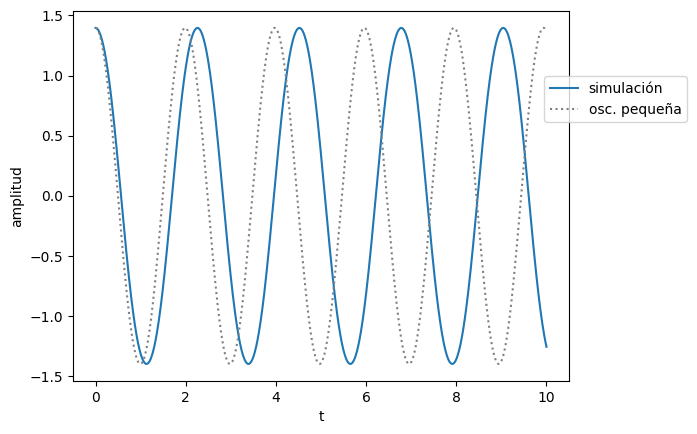

In [17]:
from scipy.integrate import odeint

t = np.linspace(0,10,1000)

g = 10
l =  1

P = 2* np.pi * np.sqrt(l/g)

x0 = np.radians(80)

teor = x0*np.cos(2*np.pi*t/P)

P2 = P*(1+1/16*x0**2 + 11/3072*x0**4)

print(f'Período teórico amplitud pequeña:    {P:.3f}')
print(f'Período teórico amplitud grande:     {P2:.3f}')

def deriv(z,t):
    x,v = z
    dx = v
    dv = -g/l * np.sin(x)
    return dx,dv


x,v = odeint( deriv, [x0, 0], t ).T

plt.plot(t,x,label='simulación')
plt.plot(t,teor,label='osc. pequeña',ls='dotted',color='gray');
plt.legend(loc=(0.95,0.7)); plt.xlabel('t'); plt.ylabel('amplitud');

# Para estimar el período seleccionamos la zona
# donde debe caer el primer pico y vemos a qué
# tiempo corresponde
tbus = (t>1) & (t < 3)

kmax = np.argmax(x[tbus])
P3 = t[tbus][kmax]

print(f'Período observado en la simulación:  {P3:.3f}')

## Método de Euler

El [método de Euler](https://en.wikipedia.org/wiki/Euler_method) sirve para resolver numéricamente ecuaciones diferenciales mediante una aproximación sencilla.

Cuando el incremento $h = t _ {k+1} - t _ k$  es "pequeño", la derivada se puede aproximar como:

$$f'(t_k) \simeq \frac{\Delta f}{\Delta t} = \frac{f(t _ {k+1})-f(t _ k)}{t _ {k+1} - t _ k} = \frac{f_ {k+1}-f_ k}{h} $$

Despejando $f_{k+1}$ tenemos:


$$ f_ {k+1} = f_ k + h\; f'(t_k)  $$

La ecuación diferencial concreta nos dirá cómo calcular el valor de la derivada, por lo que si conocemos el valor de la función en un punto podemos obtener una aproximación a su valor en el punto siguiente.

La función se irá construyendo en posiciones discretas partiendo de un valor inicial dado $f_0 = f(t_0)$.
El intervalo $h = \Delta t$ debe elegirse de un tamaño suficientemente pequeño para que la derivada de la función sea aproximadamente constante entre muestras.

Por ejemplo, si deseamos resolver la ecuación diferencial

$$ \dot x = -0.95 x$$

con condición inicial $x(0)=5$ hacemos lo siguiente:

In [18]:
x = 5
Δt = 0.01

for _ in range(10):
    x += Δt * (-0.95)*x
    print(x)

4.9525
4.90545125
4.858849463125
4.812690393225313
4.7669698344896725
4.721683621062021
4.6768276266619315
4.632397764208643
4.588389985448661
4.544800280586898


Gráficamente:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

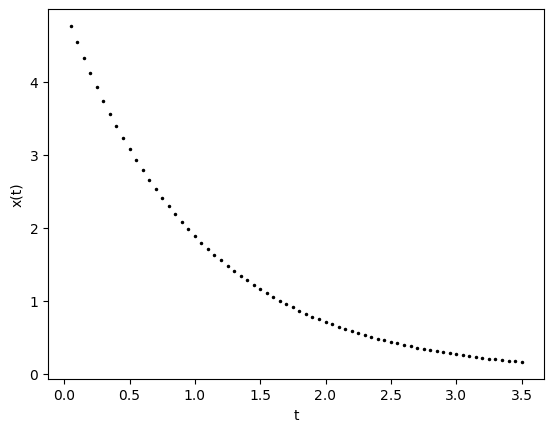

In [20]:
x = 5
Δt = 0.05
t = 0

for _ in range(70):
    x += Δt* (-0.95)*x
    t += Δt
    plt.plot([t],[x],'.',color='black',markersize=3);

plt.xlabel('t'); plt.ylabel('x(t)');

Este método requiere intervalos de integración muy pequeños para que no se acumule demasiado error, por lo que solo se utiliza en simulaciones que no necesiten mucha precisión.

## Partículas en una caja

En [este notebook](particulas.ipynb).

## ecuación del calor *

Pendiente.

## ecuación de onda *

Pendiente.